# Load and inspect data

The longitudinal VL data for the acute and rebound phase are stored in the files

- `acute-data-long.csv`
- `rebound-data-long.csv`

in long format. Here, we put the data in a more convenient format,
which we save as a "pickle" file. The pickle can then be imported in
other notebooks.

In [1]:
%matplotlib inline
import csv
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("..")
from mrmpytools import utilities as util
from mrmpytools import definitions as defn

## Rebound data

The rebound data has the following columns

0. study ID (`SID`)
1. animal ID (`ID`)
2. time of ART initiation (post infection) (`StartART`)
3. cut-off time point for data inclusion in the fit (`MaxTime`)
4. time post treatment interruption (`t`)
5. Viral load (`VL`) 
6. Viral load sensoring code (`CC`)

The censoring codes are as follows:

- 0 = uncensored
- 1 = left-censored (below the LoD)
- 3 = missing

In [2]:
## load content of CSV file

filename = os.path.join("..", "data", "rebound-data-long.csv")

with open(filename) as f:
    reader = csv.reader(f)
    table = [row for row in reader]
header = table[0]
table = table[1:]
IDs = util.unique([row[1] for row in table])


## make dictionary

data_dict = {
    ID : {"t" : [], "VL" : [], "CC" : []}
    for ID in IDs
}

for row in table:
    ID = row[1]
    rd = dict(zip(header, row))
    data_dict[ID]["t"].append(int(rd["T"]))
    data_dict[ID]["VL"].append(float(rd["VL"]))
    data_dict[ID]["CC"].append(int(rd["CC"]))
    if "StartART" not in data_dict[ID].keys():
        data_dict[ID]["StartART"] = int(rd["StartART"])
    if "SID" not in data_dict[ID].keys():
        data_dict[ID]["SID"] = rd["SID"]
    if "MaxTime" not in data_dict[ID].keys():
        data_dict[ID]["MaxTime"] = int(rd["MaxTime"])
        
        
## pickle the dictionary

pickle_name = os.path.join("..", "data", "rebound-data.pkl")
with open(pickle_name, 'wb') as f:
    pickle.dump(data_dict, f)

### Make some plots of the rebound data

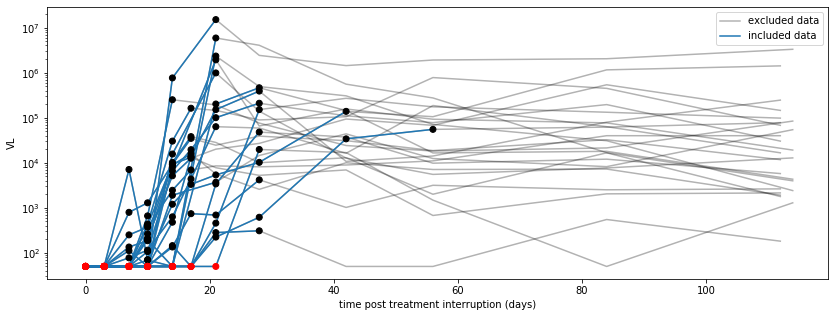

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))

for ID in IDs:
    dd = data_dict[ID]
    txs = [(t, VL, CC) for t, VL, CC in zip(dd["t"], dd["VL"], dd["CC"])]
    line1, = ax.plot(dd["t"], dd["VL"], color='k', alpha=0.3, zorder=1)
    shorttx = [tx for tx in txs if dd["MaxTime"] >= tx[0]]
    ts, VLs, CCs = util.unzip(shorttx)
    line2, = ax.plot(ts, VLs, color='tab:blue', zorder=2)
    colors = ["k" if cc == defn.uncensored_code else 'r' for cc in CCs]
    ax.scatter(ts, VLs, c=colors, zorder=3)

ax.set_ylabel("VL")
ax.set_xlabel("time post treatment interruption (days)")
ax.legend((line1, line2), ("excluded data", "included data"))

ax.set_yscale('log')

## Acute Data

The acute data has the following columns

0. study ID (`SID`)
1. animal ID (`ID`)
2. time of ART initiation (post infection) (`StartART`)
3. time post infection (`t`)
4. Viral load (`VL`) 
5. Viral load sensoring code (`CC`)

In [4]:
## load content of CSV file

filename = os.path.join("..", "data", "acute-data-long.csv")

with open(filename) as f:
    reader = csv.reader(f)
    table = [row for row in reader]
header = table[0]
table = table[1:]
IDs = util.unique([row[1] for row in table])


## make dictionary

data_dict = {
    ID : {"t" : [], "VL" : [], "CC" : []}
    for ID in IDs
}

for row in table:
    ID = row[1]
    rd = dict(zip(header, row))
    data_dict[ID]["t"].append(int(rd["T"]))
    data_dict[ID]["VL"].append(float(rd["VL"]))
    data_dict[ID]["CC"].append(int(rd["CC"]))
    if "StartART" not in data_dict[ID].keys():
        data_dict[ID]["StartART"] = int(rd["StartART"])
    if "SID" not in data_dict[ID].keys():
        data_dict[ID]["SID"] = rd["SID"]        
        
## pickle the dictionary

pickle_name = os.path.join("..", "data", "acute-data.pkl")
with open(pickle_name, 'wb') as f:
    pickle.dump(data_dict, f)

### Make some plots of the acute data

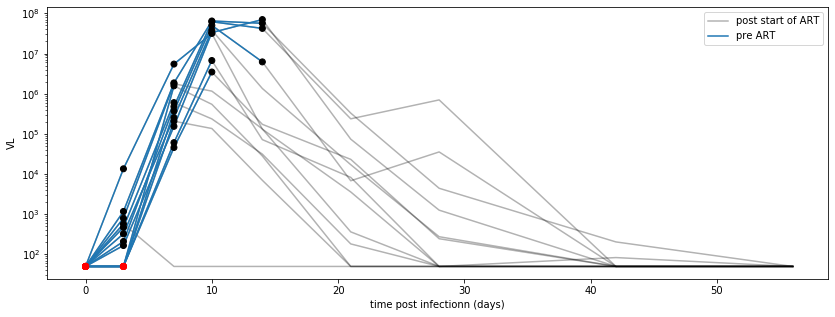

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))

for ID in IDs:
    dd = data_dict[ID]
    txs = [(t, VL, CC) for t, VL, CC in zip(dd["t"], dd["VL"], dd["CC"])]
    line1, = ax.plot(dd["t"], dd["VL"], color='k', alpha=0.3, zorder=1)
    shorttx = [tx for tx in txs if dd["StartART"] >= tx[0]]
    ts, VLs, CCs = util.unzip(shorttx)
    line2, = ax.plot(ts, VLs, color='tab:blue', zorder=2)
    colors = ["k" if cc == defn.uncensored_code else 'r' for cc in CCs]
    ax.scatter(ts, VLs, c=colors, zorder=3)

ax.set_ylabel("VL")
ax.set_xlabel("time post infectionn (days)")
ax.legend((line1, line2), ("post start of ART", "pre ART"))

ax.set_yscale('log')

Now, the data folder should contain the files

- `rebound-data.pkl`
- `acute-data.pkl`

They can be loaded in other notebooks with

```py
import pickle 
with open("/path/to/rebound-data.pkl", "rb") as f:
    data_dicts = pickle.load(f)
```